# Russel 2000 週足 メディアン統計

In [16]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [17]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'RUT'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14 00:00:00-04:00,1979.790039,2087.550049,1932.709961,2086.139893,30540660000,0.0,0.0
2022-03-21 00:00:00-04:00,2085.820068,2097.610107,2047.270020,2077.979980,22611740000,0.0,0.0
2022-03-28 00:00:00-04:00,2078.300049,2138.449951,2049.540039,2091.110107,23169700000,0.0,0.0
2022-04-04 00:00:00-04:00,2091.530029,2103.360107,1984.150024,1994.560059,23239490000,0.0,0.0
2022-04-11 00:00:00-04:00,1993.530029,2034.219971,1976.589966,2004.979980,16329620000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,2289.379883,2297.709961,2240.510010,2279.979980,22510590000,0.0,0.0
2025-02-17 00:00:00-05:00,2281.560059,2294.590088,2194.110107,2195.350098,19495560000,0.0,0.0
2025-02-24 00:00:00-05:00,2200.709961,2202.060059,2126.080078,2163.070068,26733210000,0.0,0.0


In [18]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16 00:00:00-04:00,1174.969971,1174.969971,966.219971,1013.890015,41985050000,0.0,0.0
2020-03-23 00:00:00-04:00,1014.080017,1180.319946,966.419983,1131.989990,37243200000,0.0,0.0
2020-03-30 00:00:00-04:00,1134.140015,1164.630005,1035.390015,1052.050049,30852490000,0.0,0.0
2020-04-06 00:00:00-04:00,1085.880005,1250.130005,1085.880005,1246.729980,27229510000,0.0,0.0
2020-04-13 00:00:00-04:00,1240.910034,1251.880005,1154.520020,1229.099976,27176880000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,2289.379883,2297.709961,2240.510010,2279.979980,22510590000,0.0,0.0
2025-02-17 00:00:00-05:00,2281.560059,2294.590088,2194.110107,2195.350098,19495560000,0.0,0.0
2025-02-24 00:00:00-05:00,2200.709961,2202.060059,2126.080078,2163.070068,26733210000,0.0,0.0


## Moving Median

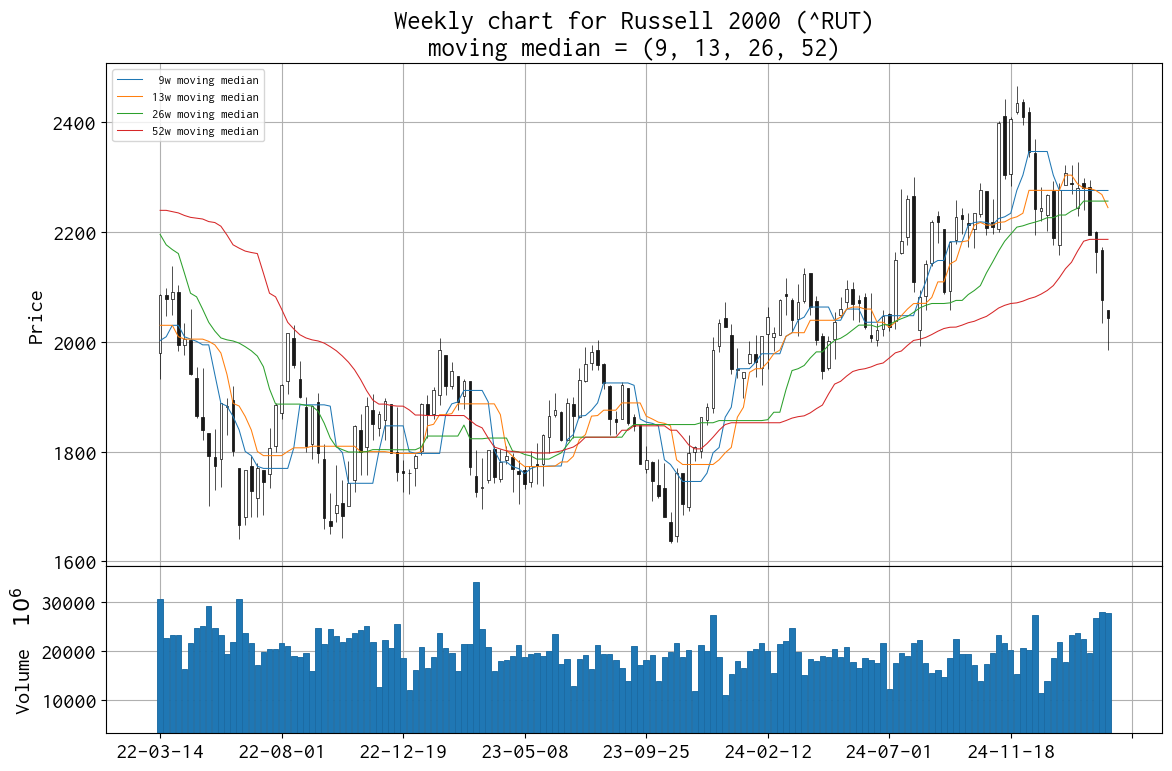

In [19]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax[0]),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (9, 13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [20]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-03 00:00:00-05:00,2168.020020,2173.570068,2033.689941,2075.479980,27908150000,0.0,0.0
2025-03-10 00:00:00-04:00,2058.090088,2058.090088,1984.920044,2044.095093,27732600000,0.0,0.0


In [21]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00-05:00    2075.479980
2025-03-10 00:00:00-04:00    2044.095093
Name: Close, dtype: float64

In [22]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00-05:00          NaN
2025-03-10 00:00:00-04:00   -31.384888
Name: Close, dtype: float64

In [23]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-10 00:00:00-04:00   -13.994995
dtype: float64

In [24]:
df['Close'].rolling(9).median().tail()

Date
2025-02-10 00:00:00-05:00    2275.879883
2025-02-17 00:00:00-05:00    2275.879883
2025-02-24 00:00:00-05:00    2275.879883
2025-03-03 00:00:00-05:00    2275.879883
2025-03-10 00:00:00-04:00    2275.879883
Name: Close, dtype: float64

In [25]:
df['Close'].rolling(13).median().tail()

Date
2025-02-10 00:00:00-05:00    2279.979980
2025-02-17 00:00:00-05:00    2279.709961
2025-02-24 00:00:00-05:00    2275.879883
2025-03-03 00:00:00-05:00    2268.469971
2025-03-10 00:00:00-04:00    2244.590088
Name: Close, dtype: float64

In [26]:
df['Close'].rolling(26).median().tail()

Date
2025-02-10 00:00:00-05:00    2256.530029
2025-02-17 00:00:00-05:00    2256.530029
2025-02-24 00:00:00-05:00    2256.530029
2025-03-03 00:00:00-05:00    2256.530029
2025-03-10 00:00:00-04:00    2256.530029
Name: Close, dtype: float64

In [27]:
df['Close'].rolling(52).median().tail()

Date
2025-02-10 00:00:00-05:00    2183.420044
2025-02-17 00:00:00-05:00    2186.790039
2025-02-24 00:00:00-05:00    2186.790039
2025-03-03 00:00:00-05:00    2186.790039
2025-03-10 00:00:00-04:00    2186.790039
Name: Close, dtype: float64

## Robust Bollinger's bands

In [28]:
period = 26
calc_robust_bollinger(df0, period)
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-03-16 00:00:00-04:00,1174.969971,1174.969971,966.219971,1013.890015,41985050000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-23 00:00:00-04:00,1014.080017,1180.319946,966.419983,1131.989990,37243200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00-04:00,1134.140015,1164.630005,1035.390015,1052.050049,30852490000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-06 00:00:00-04:00,1085.880005,1250.130005,1085.880005,1246.729980,27229510000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-13 00:00:00-04:00,1240.910034,1251.880005,1154.520020,1229.099976,27176880000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,2289.379883,2297.709961,2240.510010,2279.979980,22510590000,0.0,0.0,2243.480103,2214.007507,2299.802551,2085.314941,2428.495117
2025-02-17 00:00:00-05:00,2281.560059,2294.590088,2194.110107,2195.350098,19495560000,0.0,0.0,2256.530029,2217.897400,2299.802551,2095.039673,2422.660278
2025-02-24 00:00:00-05:00,2200.709961,2202.060059,2126.080078,2163.070068,26733210000,0.0,0.0,2256.530029,2214.007507,2299.802551,2085.314941,2428.495117


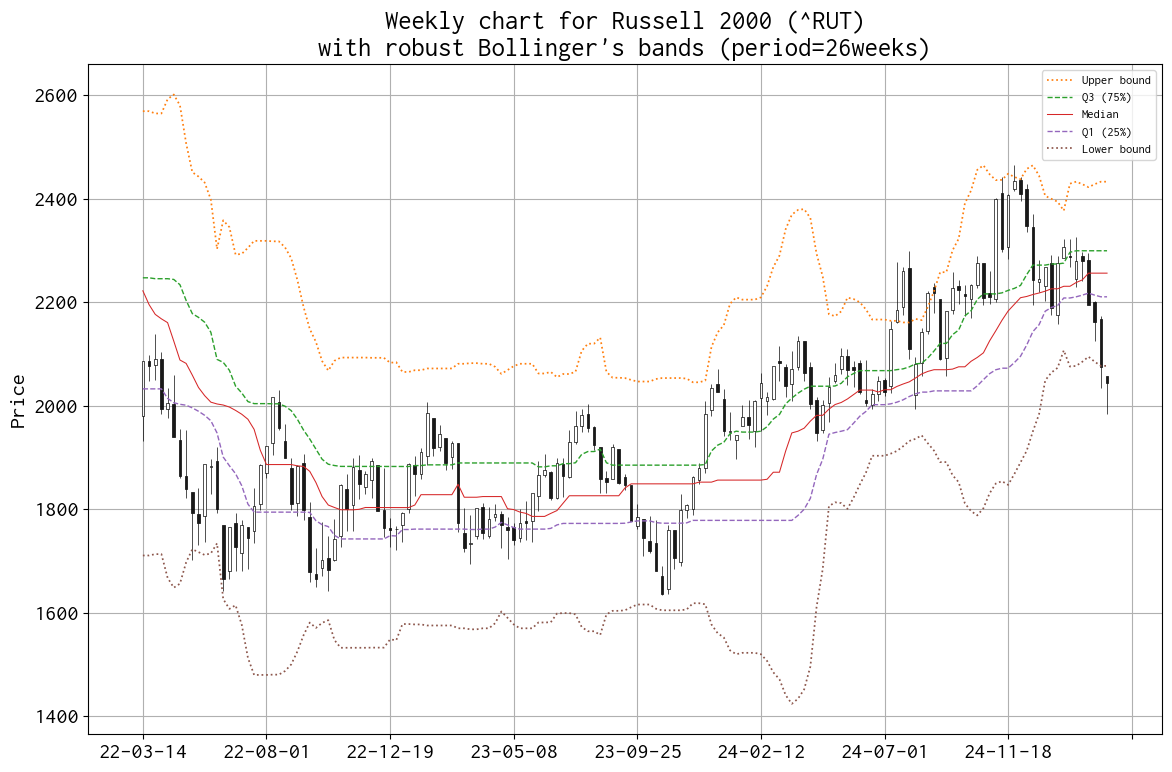

In [29]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

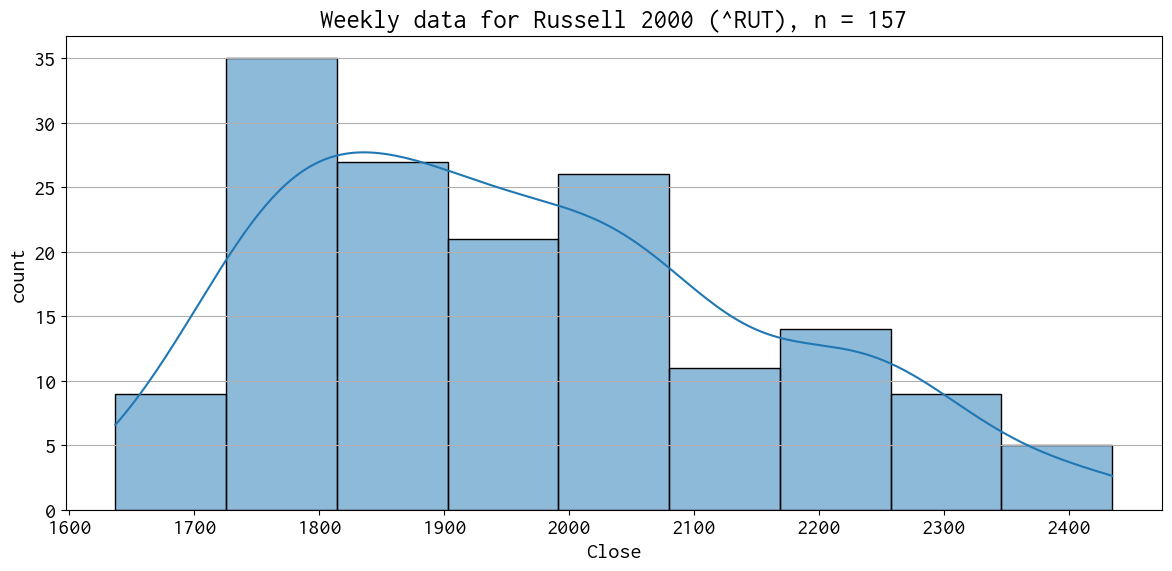

In [30]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_weekly_histogram_%s.png' % code)
plt.show()